Comparing different optimizers in Machine Learning
---

### Aim: 
Write a program to demonstrate the change in accuracy/loss/convergence time with change
in optimizers like stochastic gradient descent, adam, adagrad, RMSprop and Nadam for
any suitable application

### Objectives:
1. To learn optimization algorithms
2. To learn and understand hyperparameters


### Dataset:  

**Fashion-MNIST** is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.  


### Implementation/Program/Code: 

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
(xtr,ytr),(xte,yte)=fashion_mnist.load_data()

In [3]:
xtr.shape

(60000, 28, 28)

In [4]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],1).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],1).astype('float32')/255

In [5]:
ytr=tcg(ytr)
yte=tcg(yte)

### Model

In [6]:
def model():
    model = Sequential()

    model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))

    return model

In [7]:
batch_size = 256
epochs = 20

### Training model for different optimizers

#### Adam

In [8]:
model_adam = model()
model_adam.summary()
adam = keras.optimizers.Adam()
model_adam.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_adam = model_adam.fit(xtr,ytr, batch_size=batch_size, 
                              epochs=epochs, validation_data=(xte,yte), shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          1

#### RMSprop

In [9]:
model_rms = model()
model_rms.summary()
rmsprop = keras.optimizers.RMSprop()
model_rms.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
history_rms = model_adam.fit(xtr,ytr, batch_size=batch_size, 
                              epochs=epochs, validation_data=(xte,yte), shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)         

#### Adagrad

In [10]:
model_adagrad = model()
model_adagrad.summary()
adagrad = keras.optimizers.Adagrad()
model_adagrad.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad= model_adagrad.fit(xtr,ytr, batch_size=batch_size, 
                              epochs=epochs, validation_data=(xte,yte), shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 32)         

#### Nadam

In [11]:
model_nadam = model()
model_nadam.summary()
nadam = keras.optimizers.Nadam()
model_nadam.compile(loss='categorical_crossentropy', optimizer=nadam, metrics=['accuracy'])
history_nadam = model_nadam.fit(xtr,ytr, batch_size=batch_size, 
                              epochs=epochs, validation_data=(xte,yte), shuffle=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 32)         

#### SGD

In [12]:
model_sgd = model()
model_sgd.summary()
sgd = keras.optimizers.SGD()
model_sgd.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history_sgd = model_sgd.fit(xtr,ytr, batch_size=batch_size, 
                              epochs=epochs, validation_data=(xte,yte), shuffle=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 32)         

### Individual graphs for different optimizers

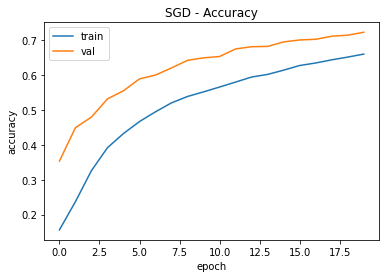

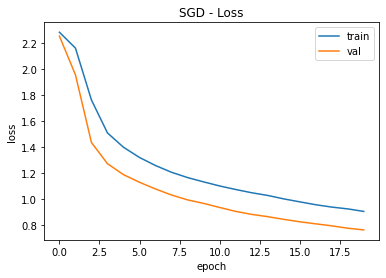

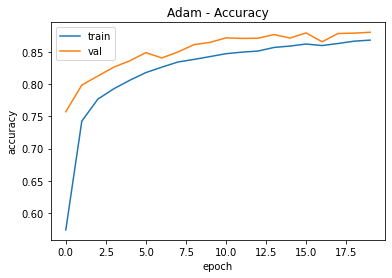

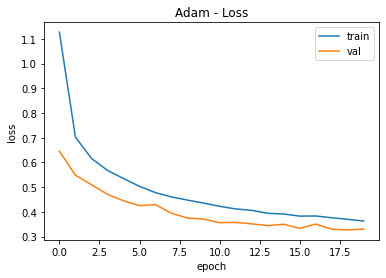

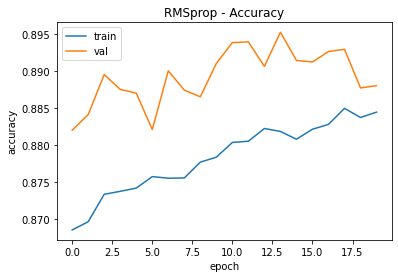

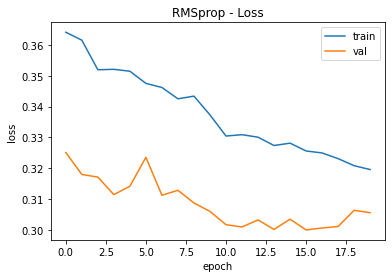

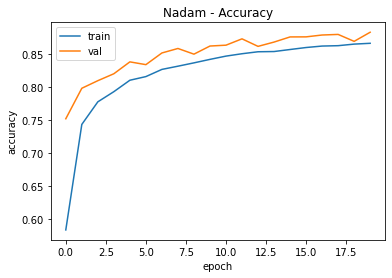

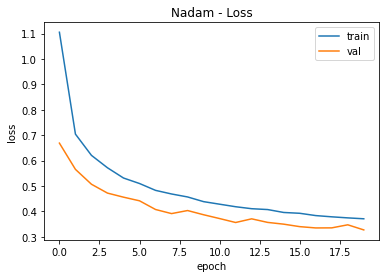

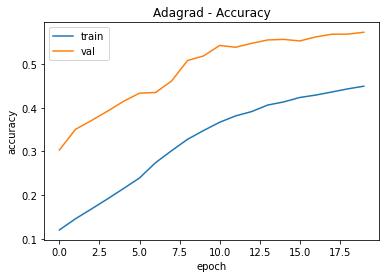

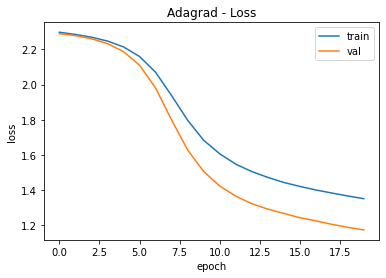

In [13]:
# SGD
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('SGD - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

# Adam
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

# RMSprop
plt.plot(history_rms.history['accuracy'])
plt.plot(history_rms.history['val_accuracy'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_rms.history['loss'])
plt.plot(history_rms.history['val_loss'])
plt.title('RMSprop - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

# Nadam
plt.plot(history_nadam.history['accuracy'])
plt.plot(history_nadam.history['val_accuracy'])
plt.title('Nadam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_nadam.history['loss'])
plt.plot(history_nadam.history['val_loss'])
plt.title('Nadam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Adagrad
plt.plot(history_adagrad.history['accuracy'])
plt.plot(history_adagrad.history['val_accuracy'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

print()
print()

plt.plot(history_adagrad.history['loss'])
plt.plot(history_adagrad.history['val_loss'])
plt.title('Adagrad - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model_adagrad.save('model_adagrad.h5')
model_nadam.save('model_nadam.h5')
model_rms.save('model_rms.h5')
model_adam.save('model_adam.h5')
model_sgd.save('model_sgd.h5')

### Model Evaluation

In [15]:
score1 = model_sgd.evaluate(xte,yte)
score2 = model_adam.evaluate(xte,yte)
score3 = model_rms.evaluate(xte,yte)
score4 = model_nadam.evaluate(xte,yte)
score5 = model_adagrad.evaluate(xte,yte)

10000/10000 [==============================] - 1s 111us/sample - loss: 1.1743 - accuracy: 0.5731


In [16]:
print(' model_sgd Test accuracy:', round(score1[1] * 100, 2))
print(' model_adam Test accuracy:', round(score2[1] * 100, 2))
print(' model_rms Test accuracy:', round(score3[1] * 100, 2))
print(' model_nadam Test accuracy:', round(score4[1] * 100, 2))
print(' model_adagrad Test accuracy:', round(score5[1] * 100, 2))

 model_sgd Test accuracy: 72.25
 model_adam Test accuracy: 88.8
 model_rms Test accuracy: 16.76
 model_nadam Test accuracy: 88.3
 model_adagrad Test accuracy: 57.31


### Comparing Training Accuracies

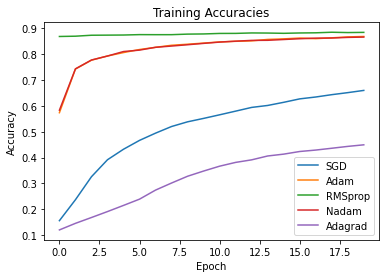

In [17]:
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_adam.history['accuracy'])
plt.plot(history_rms.history['accuracy'])
plt.plot(history_nadam.history['accuracy'])
plt.plot(history_adagrad.history['accuracy'])

plt.title('Training Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Nadam', 'Adagrad'])

### Comparing Testing Accuracies

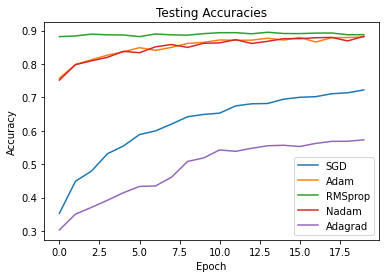

In [18]:
plt.plot(history_sgd.history['val_accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.plot(history_rms.history['val_accuracy'])
plt.plot(history_nadam.history['val_accuracy'])
plt.plot(history_adagrad.history['val_accuracy'])

plt.title('Testing Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Nadam', 'Adagrad'])

Text(0.5, 0, 'Optimizers')

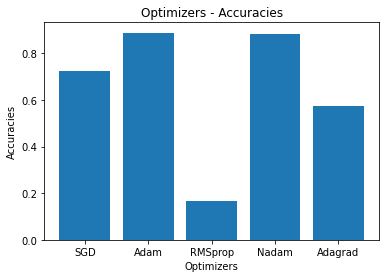

In [19]:
algo = ['SGD','Adam','RMSprop','Nadam', 'Adagrad']
accuracy = [score1[1], score2[1], score3[1], score4[1], score5[1]]
plt.bar(algo,accuracy)
plt.title('Optimizers - Accuracies')
plt.ylabel('Accuracies')
plt.xlabel('Optimizers')

### Classification Reports

In [21]:
predict_model_sgd = model_sgd.predict_classes(xte)
labels_model_sgd = np.argmax(yte, axis=1)
print("model_sgd Fashion MNIST Classification report")
print(classification_report(labels_model_sgd, predict_model_sgd))
print()

predict_model_adam = model_adam.predict_classes(xte)
labels_model_adam = np.argmax(yte, axis=1)
print("model_adam Fashion MNIST Classification report")
print(classification_report(labels_model_adam, predict_model_adam))
print()

predict_model_rms = model_rms.predict_classes(xte)
labels_model_rms = np.argmax(yte, axis=1)
print("model_rms Fashion MNIST Classification report")
print(classification_report(labels_model_rms, predict_model_rms))
print()

predict_model_nadam = model_nadam.predict_classes(xte)
labels_model_nadam = np.argmax(yte, axis=1)
print("model_nadam Fashion MNIST Classification report")
print(classification_report(labels_model_nadam, predict_model_nadam))
print()

predict_model_adagrad = model_adagrad.predict_classes(xte)
labels_model_adagrad = np.argmax(yte, axis=1)
print("model_adagrad Fashion MNIST Classification report")
print(classification_report(labels_model_adagrad, predict_model_adagrad))

model_sgd Fashion MNIST Classification report
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.93      0.90      0.92      1000
           2       0.43      0.74      0.55      1000
           3       0.70      0.75      0.72      1000
           4       0.53      0.57      0.55      1000
           5       0.90      0.81      0.85      1000
           6       0.32      0.06      0.09      1000
           7       0.82      0.83      0.83      1000
           8       0.92      0.89      0.90      1000
           9       0.84      0.93      0.88      1000

    accuracy                           0.72     10000
   macro avg       0.71      0.72      0.70     10000
weighted avg       0.71      0.72      0.70     10000


model_adam Fashion MNIST Classification report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       1.00      0.97     

### Results/Visualization Graphs
* **Training Accuracies**  
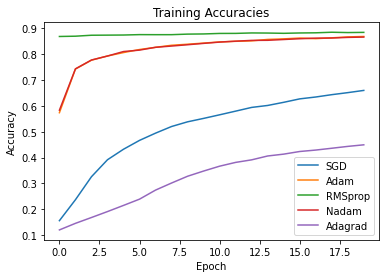  

* **Testing Accuracies**  
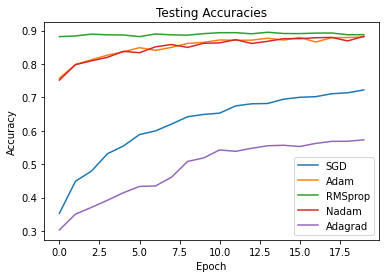  

* **Bar Graph Testing Accuracies**  
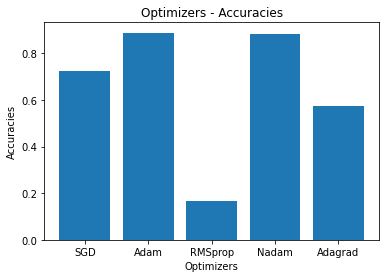  


### Analysis of results
We trained the models with multiple optimizers. Adam gave testing accuracy of 93.41 %. Adam is adaptive in nature and has momnetum due to which adam is most commonly used. Adam and Nadam performs equally good.

### Conclusion
In this experiment, we studied different optimizers and developed models with them. Adam got the best testing accuracy of 88.8 %.  